## Preparing the Dataset

- Using tensorflow's Cifar10 Dataset.
- The CIFAR-10 dataset is a popular dataset used in the field of machine learning and computer vision. It consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. 
- The dataset is divided into 50,000 training images and 10,000 testing images1234

In [2]:
import numpy as np, pandas as pd

In [3]:
from tensorflow.keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


Converting the Datatype

In [5]:
from keras.utils import to_categorical

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Normalizing

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
print(X_train[0][0][0])

[0.23137255 0.24313726 0.24705882]


In [8]:
label_dict = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

<hr>

## Displaying the Images

In [9]:
import cv2, matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

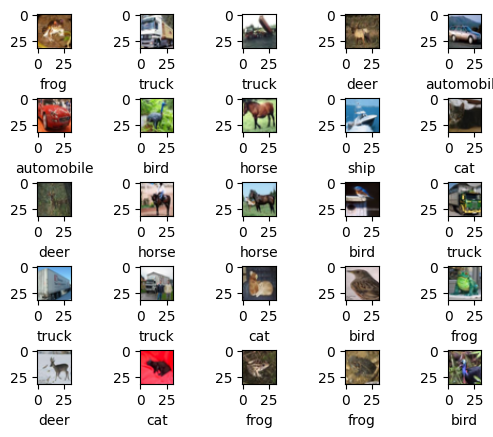

In [11]:
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train[i]);
    plt.xlabel(label_dict[y_train[i][0]])

plt.subplots_adjust(hspace=1.5)
plt.show()

<hr>

## Model Building

Initializing

In [12]:
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

First Convolution Layer

In [13]:
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))

## Other parameters include Padding, Strides

Max Pooling 1

In [14]:
model.add(MaxPooling2D((2,2)))          # pooling doesn't need any parameters like padding

Second Convolution Layer

In [15]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

Max Pooling 2

In [16]:
model.add(MaxPooling2D((2,2)))

Third Convolution Layer

In [17]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

Max Pooling 3

In [18]:
model.add(MaxPooling2D((2,2)))

Flattening

In [19]:
model.add(Flatten())

Dense Layers after Flattening

In [20]:
model.add(Dense(64, activation='relu'))

# OUTPUT LAYER

model.add(Dense(10, activation='relu'))            # 10 because we have ten classes

<hr>

## Model Summary

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

<hr>

## Model Compilation

***Sparse categorical cross-entropy*** is an extension of the categorical cross-entropy loss function that is used when the output labels are represented in a sparse matrix format. In a sparse matrix format, the labels are represented as a single index value rather than a one-hot encoded vector.

In [22]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer='adam', 
              loss= SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ['accuracy'])

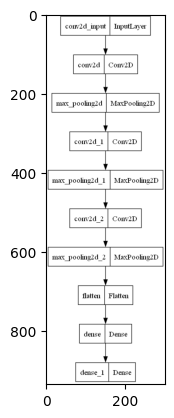

In [26]:
from keras.utils import plot_model

plot_model(model, to_file='../data/model.png')

import matplotlib.image as mpimg

img = mpimg.imread('model.png')
plt.imshow(img)
plt.show()

<hr>

## Model Training

In [24]:
history = model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=5,
          batch_size=64)

Epoch 1/5
782/782 [==============================] - 50s 63ms/step - loss: 1.4868 - accuracy: 0.5042 - val_loss: 1.4998 - val_accuracy: 0.4975
Epoch 2/5
782/782 [==============================] - 45s 57ms/step - loss: 1.4478 - accuracy: 0.5167 - val_loss: 1.4931 - val_accuracy: 0.5039
Epoch 3/5
782/782 [==============================] - 45s 57ms/step - loss: 1.4167 - accuracy: 0.5257 - val_loss: 1.5232 - val_accuracy: 0.4951
Epoch 4/5
782/782 [==============================] - 42s 54ms/step - loss: 1.3917 - accuracy: 0.5310 - val_loss: 1.4814 - val_accuracy: 0.5037
Epoch 5/5
782/782 [==============================] - 39s 50ms/step - loss: 1.3656 - accuracy: 0.5387 - val_loss: 1.4292 - val_accuracy: 0.5176


In [30]:
print(history.history)

{'loss': [1.4867669343948364, 1.4478133916854858, 1.4166901111602783, 1.3916672468185425, 1.3655999898910522], 'accuracy': [0.5041800141334534, 0.5167199969291687, 0.52565997838974, 0.531000018119812, 0.5386800169944763], 'val_loss': [1.4998384714126587, 1.493100881576538, 1.5232077836990356, 1.4813965559005737, 1.4292335510253906], 'val_accuracy': [0.4975000023841858, 0.5038999915122986, 0.4950999915599823, 0.5037000179290771, 0.5175999999046326]}


<hr>

## Predictions and Evaluations

In [29]:
loss, accuracy = model.evaluate(X_test, y_test)

print(loss)
print(accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 1.4292 - accuracy: 0.5176
1.429234266281128
0.5175999999046326


<hr><hr>